# Exploratory Data Analysis on Co2 emission (1990-to-2022)

GettyImages-1303511343.avif
Image Source: https://www.iea.org/news/defying-expectations-co2-emissions-from-global-fossil-fuel-combustion-are-set-to-grow-in-2022-by-only-a-fraction-of-last-year-s-big-increase

I will be doing data analysis on Co2 emission (1990-to-2022). I have downloaded the dataset from Kaggle (https://www.kaggle.com/datasets/thedevastator/global-fossil-co2-emissions-by-country-2002-2022). I will be using different tools like pandas, seaborn, matplotlib and numpy etc, to analyse the data.

# About the Dataset
This dataset provides an in-depth look into the global CO2 emissions at the country-level, allowing for a better understanding of how much each country contributes to the global cumulative human impact on climate. It contains information on total emissions as well as from coal, oil, gas, cement production and flaring, and other sources. The data also provides a breakdown of per capita CO2 emission per country - showing which countries are leading in pollution levels and identifying potential areas where reduction efforts should be concentrated. This dataset is essential for anyone who wants to get informed about their own environmental footprint or conduct research on international development trends.

## Downloading the Dataset

To kick start my project, first I will download the dataset from some source.

In [ ]:
!pip install jovian opendatasets --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 KB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import pandas as pd
import numpy as np

Let's begin by downloading the data, and listing the files within the dataset.

In [ ]:
# Change this
dataset_url = 'https://www.kaggle.com/datasets/thedevastator/global-fossil-co2-emissions-by-country-2002-2022' 

In [ ]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nitinjoshi07
Your Kaggle Key: ··········


100%|██████████| 1.71M/1.71M [00:00<00:00, 2.03MB/s]

The dataset has been downloaded and extracted.

In [ ]:
import os
os.listdir('global-fossil-co2-emissions-by-country-2002-2022')

['GCB2022v27_MtCO2_flat_metadata.json',
 'GCB2022v27_MtCO2_flat.csv',
 'GCB2022v27_percapita_flat_metadata.json',
 'GCB2022v27_sources_flat.csv',
 'GCP fossilCO2 2022v27.pdf',
 'GCB2022v27_percapita_flat.csv']

In [ ]:
project_name = "global-fossil-co2-emissions-by-country"

# Data Preparation and Cleaning

Here I will be preparing the downloaded data for Analysis. First I'll try to understand data using pandas and numpy and then I will clean it if required for further analysis.

In [ ]:
new_df= pd.read_csv('global-fossil-co2-emissions-by-country-2002-2022/GCB2022v27_MtCO2_flat.csv')
new_df

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
63099,Global,WLD,2017,36096.739276,14506.973805,12242.627935,7144.928128,1507.923185,391.992176,302.294047,4.749682
63100,Global,WLD,2018,36826.506600,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,302.478706,4.792753
63101,Global,WLD,2019,37082.558969,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,306.638573,4.775633
63102,Global,WLD,2020,35264.085734,14174.564010,11191.808551,7556.290283,1637.537532,407.583673,296.301685,4.497423


In [ ]:
co2_df = new_df.copy()

In [ ]:
co2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63104 entries, 0 to 63103
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             63104 non-null  object 
 1   ISO 3166-1 alpha-3  61472 non-null  object 
 2   Year                63104 non-null  int64  
 3   Total               62904 non-null  float64
 4   Coal                21744 non-null  float64
 5   Oil                 21717 non-null  float64
 6   Gas                 21618 non-null  float64
 7   Cement              20814 non-null  float64
 8   Flaring             21550 non-null  float64
 9   Other               1620 non-null   float64
 10  Per Capita          18974 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 5.3+ MB


In [ ]:
co2_df.shape

(63104, 11)

Here I see that this dataset has 63104 rows and 11 columns. Years wise it start from 1750 but there is no data collection that time so all the countries has NaN value. I will be dropping values up to year 1900. Also ISO 3166-alpha-3 columns has no relevance to this analysis. Hence dropping this columns too. 

In [ ]:
co2_df.drop(['ISO 3166-1 alpha-3'], axis=1, inplace=True)
co2_df.drop(co2_df[(co2_df['Year'] <1900)].index, inplace=True)

In [ ]:
co2_df

,Country,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
150,Afghanistan,1900,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151,Afghanistan,1901,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152,Afghanistan,1902,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153,Afghanistan,1903,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,Afghanistan,1904,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
63099,Global,2017,36096.739276,14506.973805,12242.627935,7144.928128,1507.923185,391.992176,302.294047,4.749682
63100,Global,2018,36826.506600,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,302.478706,4.792753
63101,Global,2019,37082.558969,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,306.638573,4.775633
63102,Global,2020,35264.085734,14174.564010,11191.808551,7556.290283,1637.537532,407.583673,296.301685,4.497423


In [ ]:
co2_df.isnull().sum()

Country           0
Year              0
Total            50
Coal           9370
Oil            9293
Gas            9365
Cement        10119
Flaring        9415
Other         26684
Per Capita    10544
dtype: int64

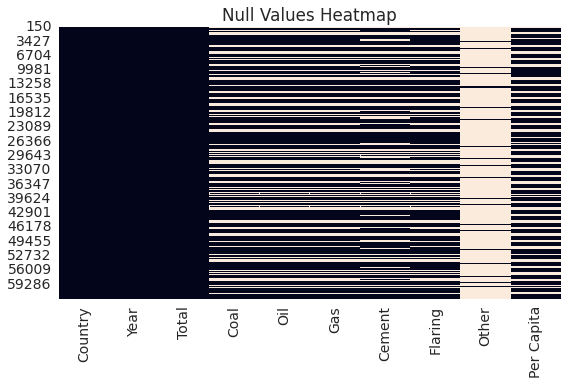

In [ ]:
figsize=(16, 8)
sns.heatmap(co2_df.isnull(), cbar=False)
plt.title('Null Values Heatmap')
plt.show()

As we see there are still lot of null values because some countries may have start collection data by 1920 and some may not. if I will need I will clear them later.

# Exploratory Analysis and Visualization


Here I will be visualizing cleaned data using matplotlib and seaborn, and try to find some insights.


Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

#### Exploring which country is most responsible for co2 emission (Total value more than 700) through out the history. 

In [ ]:
co2_df.drop(co2_df[(co2_df['Country']) == "International Transport"].index, inplace=True)
co2_df.drop(co2_df[(co2_df['Country']) == 'Global'].index, inplace=True)

In [ ]:
filter_df = co2_df[co2_df.Total > 700]
filter_df

,Country,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
10817,China,1959,720.151557,695.438192,19.049136,0.556928,5.107301,0.000000,NaN,1.104223
10818,China,1960,798.799921,748.375664,22.991600,1.993216,6.514202,0.000000,18.925239,1.221088
10828,China,1970,807.952627,665.866048,94.644784,5.503328,10.718256,0.000000,31.220211,0.982272
10829,China,1971,909.209700,736.424280,120.090762,7.174082,13.124041,0.791421,31.605115,1.078176
10830,China,1972,968.645596,770.721770,138.327537,9.280949,14.717164,1.022260,34.575917,1.122624
...,...,...,...,...,...,...,...,...,...,...
60107,USA,2017,5210.957584,1308.479533,2314.675386,1460.391796,40.323535,59.245489,27.841845,15.800777
60108,USA,2018,5376.657233,1256.201494,2365.283480,1618.720337,38.970745,72.786925,24.694251,16.187923
60109,USA,2019,5259.143836,1070.723931,2358.831137,1673.999100,40.895869,88.383147,26.310652,15.730884
60110,USA,2020,4715.691109,878.972885,2049.336500,1653.677852,40.687747,67.684371,25.331754,14.037218


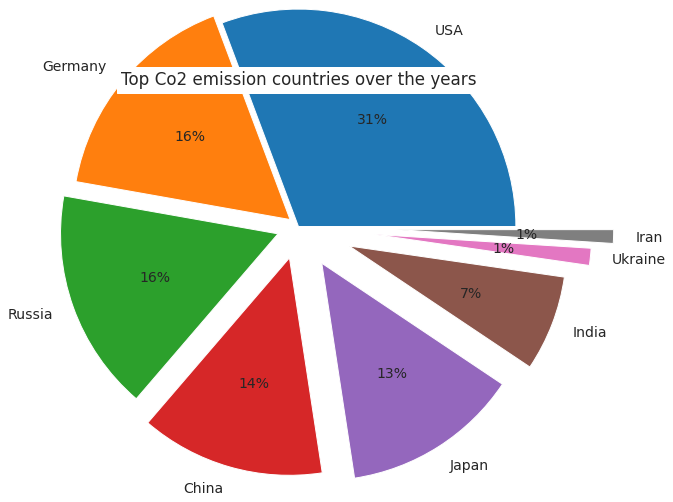

In [ ]:
plt.axis('equal')
df = filter_df['Country'].value_counts()
plt.pie(df, labels=df.index, autopct="%.0f%%", radius = 2, explode = (0, 0.1, 0.2, 0.3, 0.4,0.5,0.7,0.9))
plt.title("Top Co2 emission countries over the years", bbox={'facecolor':'1.0', 'pad':4})
plt.show()

Surprising to see that USA has third largest population but they have emitted more co2 than China and India. 

#### Let us also see the emission per capita and verify above result.

Text(0, 0.5, 'Per Capita')

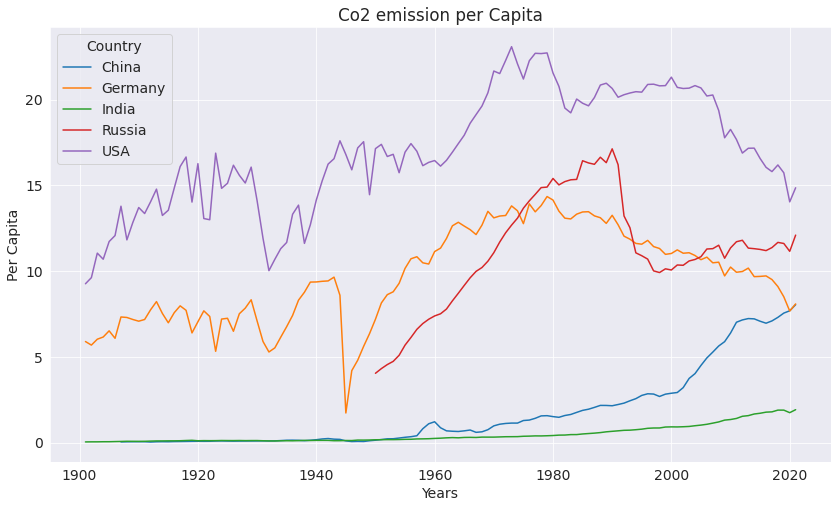

In [ ]:
full_df = co2_df.loc[(co2_df['Country'].isin(['China','India','USA','Germany','Russia'])) & (co2_df['Year'] > 1900)]
plt.figure(figsize = (14,8))
sns.lineplot(data=full_df, x='Year', y='Per Capita', hue='Country')
plt.title('Co2 Emission per Capita')
plt.xlabel('Years')
plt.ylabel('Per Capita')

It is clear from above that even though India and China are the second largest and the largest population respectively in the world but the USA produces more co2 emission per capita than any other country in the world.

#### Below I am exploring which factor is the most responsible for co2 emission globally. 

In [ ]:
global_df = co2_df.loc[(co2_df['Country'].isin(['Global']))]

Text(0, 0.5, 'Total')

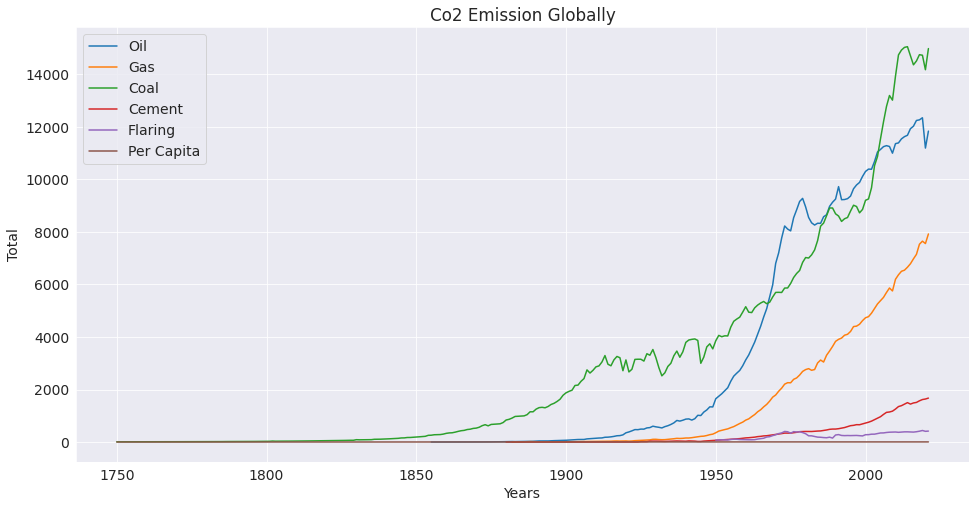

In [ ]:
df = pd.DataFrame(global_df, columns=[ 'Oil', 'Gas','Year','Coal', 'Cement','Flaring', 'Other','Per Capita'])
df.plot(x = 'Year', y=[ 'Oil', 'Gas','Coal', 'Cement','Flaring', 'Per Capita'], kind= 'line', figsize=(16, 8))
plt.title('Co2 Emission Globally')
plt.xlabel('Years')
plt.ylabel('Total')

#### Below I am exploring how much co2 emission most densely populated countries have emitted in recent years. 

In [ ]:
dense_df = co2_df.loc[(co2_df['Country'].isin(['Macao', 'Singapore', 'Hong Kong']))  & (co2_df['Year'] > 2010)]

Text(0, 0.5, 'Total emission')

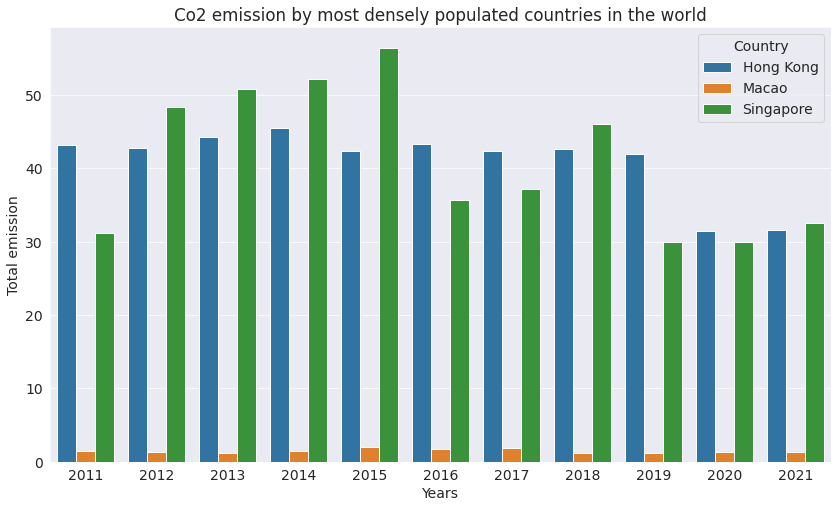

In [ ]:
plt.figure(figsize = (14,8))
sns.barplot(data=dense_df, x='Year', y='Total', hue='Country')
plt.title('Co2 emission by most densely populated countries in the world')
plt.xlabel('Years')
plt.ylabel('Total emission')

Surprise to see that despite being the most green country in Asia, Singapore has toped the list. Do note that few countries data is not available. Such as : Monaco and Gibraltar 

# Asking and Answering Questions

I will asking some question and answering them using some graphs and numrical computing.

#### Q1: Total how may countries are in the data set? Give a list of them.

In [ ]:
co2_df.drop(co2_df[(co2_df['Country']) == "International Transport"].index, inplace=True)
co2_df.drop(co2_df[(co2_df['Country']) == 'Global'].index, inplace=True)

In [ ]:
num_countries = len(co2_df["Country"].unique())
print('There are {} countries in the dataset'.format(num_countries))

There are 230 countries in the dataset


In [ ]:
name = co2_df["Country"].unique()
name

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Christmas Island', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire",
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'North Korea', 'Democratic Republic of the Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
   

#### Q2: How does india's dataset look like over the years? Which factor play a major role for co2 emission in india?

In [ ]:
india_df = co2_df.loc[(co2_df['Country'].isin(['India']))]
india_df

,Country,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
25446,India,1900,11.929576,10.654504,1.275072,0.000000,NaN,0.000000,NaN,0.041932
25447,India,1901,13.179692,11.552876,1.626816,0.000000,NaN,0.000000,NaN,0.046051
25448,India,1902,14.515440,12.925630,1.589809,0.000000,NaN,0.000000,NaN,0.050401
25449,India,1903,14.802139,12.951819,1.850320,0.000000,NaN,0.000000,NaN,0.051095
25450,India,1904,16.561026,14.307666,2.253360,0.000000,NaN,0.000000,NaN,0.056813
...,...,...,...,...,...,...,...,...,...,...
25563,India,2017,2434.867906,1560.988150,631.087430,118.922003,121.047241,2.823083,NaN,1.798018
25564,India,2018,2600.446463,1677.600364,655.190293,126.201229,138.964893,2.489684,NaN,1.899518
25565,India,2019,2626.459473,1677.653708,674.011463,128.675994,143.664137,2.454171,NaN,1.898949
25566,India,2020,2445.011942,1588.060207,603.602160,127.635380,122.908202,2.805994,NaN,1.750956


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Text(0.5, 1.0, 'Co2 Emission India')

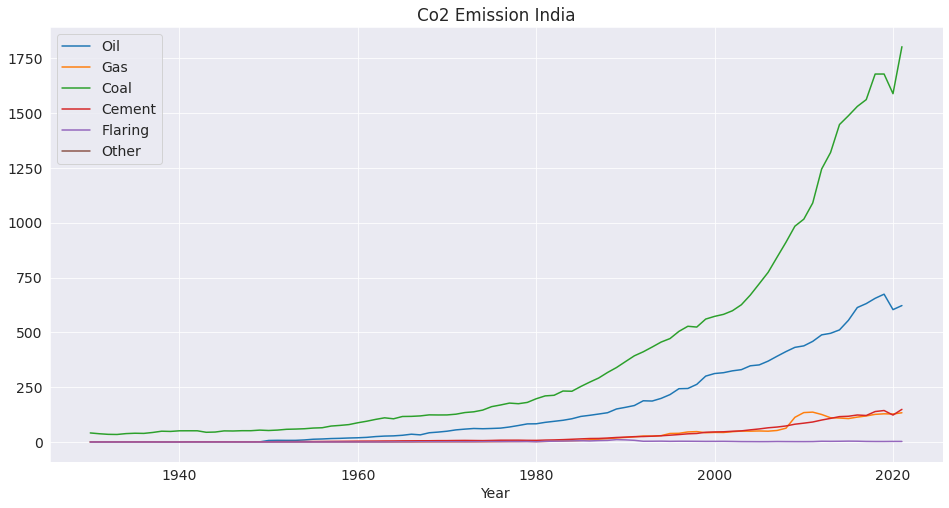

In [ ]:
india_df.drop(india_df[(india_df['Year'] < 1930)].index, inplace=True)
df = pd.DataFrame(india_df, columns=[ 'Oil', 'Gas','Year','Coal', 'Cement','Flaring', 'Other','Per Capita'])
df.plot(x = 'Year', y=[ 'Oil', 'Gas','Coal', 'Cement','Flaring', 'Other'], kind= 'line', figsize=(16, 8))
plt.title('Co2 Emission India')

As we see from the plot, coal burning is major source of Co2 emission in India. Also, Cement and Gas produces similar amount of Co2 emission.

#### Q3: How does the top four most populated country are compared in co2 emission by burning coal?

Text(0, 0.5, 'Coal emission')

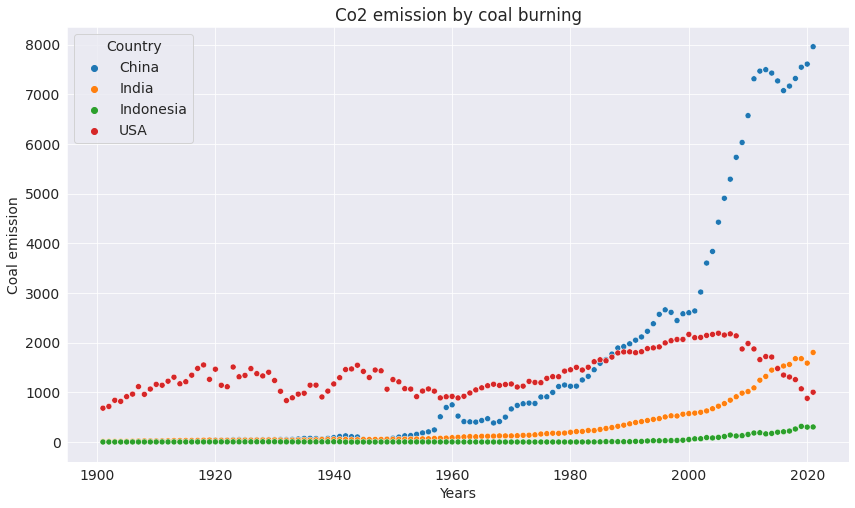

In [ ]:
full_df = co2_df.loc[(co2_df['Country'].isin(['China','India', 'USA','Indonesia'])) & (co2_df['Year'] > 1900)]
plt.figure(figsize = (14,8))
sns.scatterplot(data=full_df, x='Year', y='Coal', hue='Country')
plt.title('Co2 emission by coal burning')
plt.xlabel('Years')
plt.ylabel('Coal emission')

As we see from the plot by coal burning c02 emission China top the list and in the last decade china is topping the list significantly. 

#### Q4: How does the top three most oil producer countries are compared in co2 emission by burning oil and how does India and China (being the second and the third most oil consumer in the world) compare to them?

Text(0, 0.5, 'Oil emission')

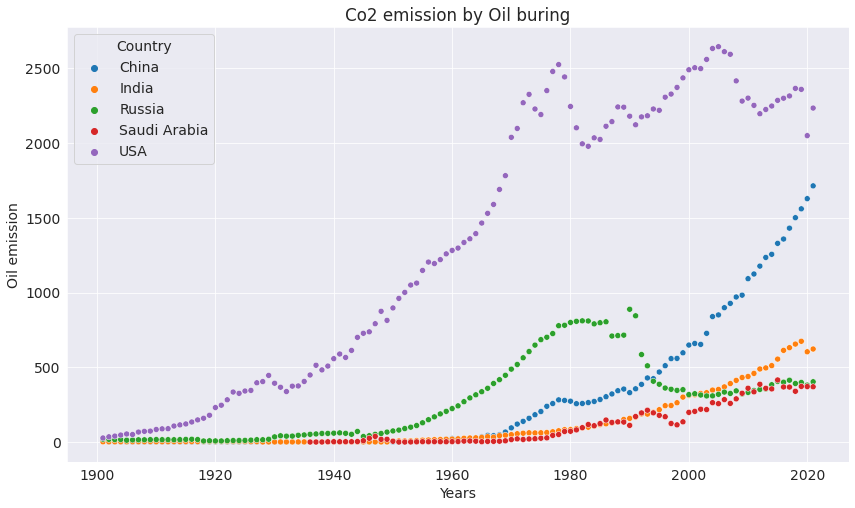

In [ ]:
full_df = co2_df.loc[(co2_df['Country'].isin(['USA','Russia','Saudi Arabia','India', 'China'])) & (co2_df['Year'] > 1900)]
plt.figure(figsize = (14,8))
sns.scatterplot(data=full_df, x='Year', y='Oil', hue='Country')
plt.title('Co2 emission by Oil buring')
plt.xlabel('Years')
plt.ylabel('Oil emission')

As we see from the above plot, USA top the list as it is the largest oil producer in the world.   

#### Q5: How much Co2 emission done by India, China and USA in last few years?

Text(0, 0.5, 'Total emission')

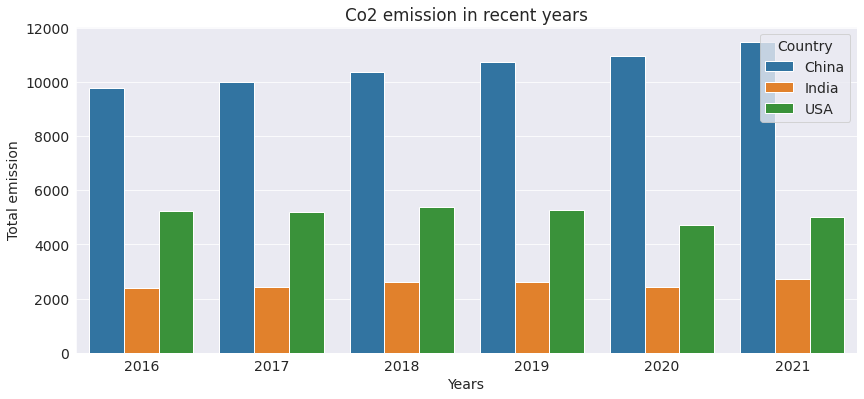

In [ ]:
full_df = new_df.loc[(new_df['Country'].isin(['India','USA','China','Global'])) & (new_df['Year'] > 2015)]
plt.figure(figsize = (14,6))
sns.barplot(data=full_df, x='Year', y='Total', hue='Country')
plt.title('Co2 emission in recent years')
plt.xlabel('Years')
plt.ylabel('Total emission')

As we see from the plots China has produces most co2 emission in last few years. Also note that due to the Covid-19 break out worldwide lock-down had been imposed globally, resulted slight dip in co2 emission in 2020.

## Inferences and Conclusion
Through my analysis I have found that coal and oil burning is the major source of co2 emission throughout the history. Even though USA have significantly less population compared to India and China but they are the most co2 producer nation by huge margin (per capita and overall). This analysis also point that for country like India and China, coal burning is the major source of energy and co2 emission.

## References and Future Work

Some references:


1: https://mode.com/python-tutorial/libraries/pandas/#:~:text=Pandas%20is%20a%20Python%20library,extremely%20active%20community%20of%20contributors.
2: https://www.geeksforgeeks.org/graph-plotting-in-python-set-1/
3: https://www.kaggle.com/datasets
4: https://github.com/

Future Work

It would be interesting to do the analysis if we include the data of most energy consumption by nations and globally. It will also help to analyze the energy waste done the countries.  